# CrowdTruth for Multiple Choice Tasks: Person Type Annotation in Video

In this tutorial, we will apply CrowdTruth metrics to a **multiple choice** crowdsourcing task for **Person Type Annotation** from **video fragments**. The workers were asked to watch a video of about 3-5 seconds and then pick from a multiple choice list which are the types of person that appear in the video fragment. The task was executed on [FigureEight](https://www.figure-eight.com/). For more crowdsourcing annotation task examples, click [here](https://raw.githubusercontent.com/CrowdTruth-core/tutorial/getting_started.md).

To replicate this experiment, the code used to design and implement this crowdsourcing annotation template is available here: [template](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/templates/People-Video-Multiple-Choice/template.html), [css](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/templates/People-Video-Multiple-Choice/template.css), [javascript](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/templates/People-Video-Multiple-Choice/template.js). 

This is a screenshot of the task as it appeared to workers:
![Task Template](../img/person-video-multiple-choice.png)"

A sample dataset for this task is available in [this file](https://raw.githubusercontent.com/CrowdTruth/CrowdTruth-core/master/tutorial/data/person-video-multiple-choice.csv), containing raw output from the crowd on FigureEight. Download the file and place it in a folder named `data` that has the same root as this notebook. Now you can check your data:

In [1]:
import pandas as pd

test_data = pd.read_csv("../data/person-video-multiple-choice.csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,description,descriptiontags,hiddeninput_gold,imagelocation,imagetags,keyframeid_gold,selected_answer_gold,subtitles,subtitletags,videolocation
0,1856509899,8/20/2018 18:40:05,3990340198,8/20/2018 18:39:51,False,clixsense,1.0,40712302,GBR,J8,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...
1,1856509899,8/20/2018 19:07:38,3990381441,8/20/2018 19:07:29,False,clixsense,1.0,40925305,CAN,QC,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...
2,1856509899,8/20/2018 19:19:02,3990407780,8/20/2018 19:18:52,False,imerit_india,1.0,44399792,USA,LA,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...
3,1856509899,8/20/2018 19:20:32,3990410322,8/20/2018 19:20:14,False,elite,1.0,44185847,USA,FL,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...
4,1856509899,8/20/2018 19:27:03,3990420566,8/20/2018 19:26:19,False,imerit_india,1.0,42395899,USA,LA,...,NaN,NaN,NaN,https://joran.org/ct/entity.admin.unit.2649/85...,industry__c0_###_grinder__c1_###_production__c...,NaN,NaN,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [2]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Person Type Annotation in Video task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of relations
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [3]:
class TestConfig(DefaultConfig):
    inputColumns = ["videolocation", "subtitles", "imagetags", "subtitletags"]
    outputColumns = ["selected_answer"]
    
    # processing of a closed task
    open_ended_task = False
    annotation_vector = ["archeologist", "architect", "artist", "astronaut", "athlete", "businessperson","celebrity", 
                         "chef", "criminal", "engineer", "farmer", "fictionalcharacter", "journalist", "judge", 
                         "lawyer", "militaryperson", "model", "monarch", "philosopher", "politician", "presenter", 
                         "producer", "psychologist", "scientist", "sportsmanager", "writer", "none", "other"]
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [4]:
data, config = crowdtruth.load(
    file = "../data/person-video-multiple-choice.csv",
    config = TestConfig()
)

data['judgments'].head()

,output.selected_answer,output.selected_answer.count,output.selected_answer.unique,unit,worker,started,submitted,duration,job
judgment,,,,,,,,,
3990340198,"{'astronaut': 1, 'archeologist': 0, 'architect...",1,28,1856509899,40712302,2018-08-20 18:39:51,2018-08-20 18:40:05,14,../data/person-video-multiple-choice
3990381441,"{'astronaut': 1, 'scientist': 1, 'archeologist...",2,28,1856509899,40925305,2018-08-20 19:07:29,2018-08-20 19:07:38,9,../data/person-video-multiple-choice
3990407780,"{'astronaut': 1, 'archeologist': 0, 'architect...",1,28,1856509899,44399792,2018-08-20 19:18:52,2018-08-20 19:19:02,10,../data/person-video-multiple-choice
3990410322,"{'astronaut': 1, 'archeologist': 0, 'architect...",1,28,1856509899,44185847,2018-08-20 19:20:14,2018-08-20 19:20:32,18,../data/person-video-multiple-choice
3990420566,"{'astronaut': 1, 'archeologist': 0, 'architect...",1,28,1856509899,42395899,2018-08-20 19:26:19,2018-08-20 19:27:03,44,../data/person-video-multiple-choice


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [5]:
results = crowdtruth.run(data, config)

`results` is a dict object that contains the quality metrics for video fragments, annotations and crowd workers.

The **video fragments metrics** are stored in `results["units"]`:

In [6]:
results["units"].head()

,duration,input.imagetags,input.subtitles,input.subtitletags,input.videolocation,job,output.selected_answer,output.selected_answer.annotations,output.selected_answer.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,
1856509899,24.95,industry__c0_###_grinder__c1_###_production__c...,Italian astronaut samantha cristoforetti uploa...,Italian__0_###_astronaut__1_###_samantha__2_##...,https://joran.org/ct/entity.admin.unit.2649/85...,../data/person-video-multiple-choice,"{'astronaut': 20, 'scientist': 3, 'other': 1, ...",25,4,20,0.919461,"{'astronaut': 1.0, 'scientist': 0.169109758893...",0.865963,"{'astronaut': 1.0, 'scientist': 0.15, 'other':..."
1856509900,30.00,man__c0_###_soccer__c1_###_portrait__c2_###_pe...,this phenomena is it's massive the,phenomena__0_###_massive__1_###_,https://joran.org/ct/entity.admin.unit.2649/85...,../data/person-video-multiple-choice,"{'celebrity': 2, 'journalist': 2, 'presenter':...",29,11,20,0.290902,"{'celebrity': 0.007285683902434039, 'journalis...",0.239176,"{'celebrity': 0.1, 'journalist': 0.1, 'present..."
1856509901,32.15,people__c0_###_man__c1_###_adult__c2_###_portr...,around could the lights be coming from,lights__0_###_coming__1_###_,https://joran.org/ct/entity.admin.unit.2649/85...,../data/person-video-multiple-choice,"{'artist': 1, 'celebrity': 1, 'producer': 1, '...",25,9,20,0.295147,"{'artist': 0.006139167492493724, 'celebrity': ...",0.216495,"{'artist': 0.05, 'celebrity': 0.05, 'producer'..."
1856509902,46.20,water__c0_###_no person__c1_###_ocean__c2_###_...,when investigators map the coordinates onto lo...,investigators__0_###_map__1_###_coordinates__2...,https://joran.org/ct/entity.admin.unit.2649/85...,../data/person-video-multiple-choice,"{'scientist': 5, 'none': 11, 'presenter': 2, '...",24,8,20,0.552869,"{'scientist': 0.15804046047341153, 'none': 0.7...",0.334078,"{'scientist': 0.25, 'none': 0.55, 'presenter':..."
1856509903,35.85,sky__c0_###_no person__c1_###_power__c2_###_el...,the bright lights are part of a,bright lights__0_###_,https://joran.org/ct/entity.admin.unit.2649/85...,../data/person-video-multiple-choice,"{'none': 15, 'other': 2, 'fictionalcharacter':...",21,6,20,0.963842,"{'none': 0.9830831242894289, 'other': 0.008259...",0.557895,"{'none': 0.75, 'other': 0.1, 'fictionalcharact..."


The `uqs` column in `results["units"]` contains the **video fragment quality scores**, capturing the overall workers agreement over each video fragment. Here we plot its histogram:

## Video Fragment Quality Score

Text(0, 0.5, 'Video Fragments')

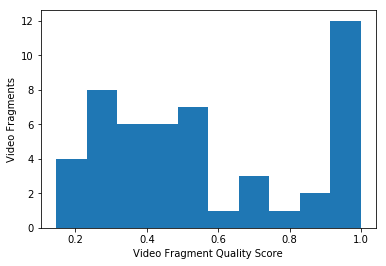

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results["units"]["uqs"])
plt.xlabel("Video Fragment Quality Score")
plt.ylabel("Video Fragments")

The `unit_annotation_score` column in `results["units"]` contains the **video fragment-annotation scores**, capturing the likelihood that an annotation is expressed in a video fragment. For each video fragment, we store a dictionary mapping each annotation to its video fragment-annotation score.

In [8]:
results["units"]["unit_annotation_score"].head()

unit
1856509899    {'astronaut': 1.0, 'scientist': 0.169109758893...
1856509900    {'celebrity': 0.007285683902434039, 'journalis...
1856509901    {'artist': 0.006139167492493724, 'celebrity': ...
1856509902    {'scientist': 0.15804046047341153, 'none': 0.7...
1856509903    {'none': 0.9830831242894289, 'other': 0.008259...
Name: unit_annotation_score, dtype: object

### Ambiguous video fragments

In [9]:
results["units"].sort_values(by=["uqs"])[["input.videolocation", "uqs", "unit_annotation_score"]].head()

,input.videolocation,uqs,unit_annotation_score
unit,,,
1856509905,https://joran.org/ct/entity.admin.unit.2649/85...,0.146278,"{'other': 0.28844109454744976, 'presenter': 0...."
1856509931,https://joran.org/ct/entity.admin.unit.2833/90...,0.194667,"{'engineer': 0.15692508334014804, 'journalist'..."
1856509938,https://joran.org/ct/entity.admin.unit.2833/90...,0.207788,"{'businessperson': 0.06949004651596365, 'prese..."
1856509921,https://joran.org/ct/entity.admin.unit.2848/88...,0.220392,"{'monarch': 0.42098378954483356, 'other': 0.27..."
1856509944,https://joran.org/ct/entity.admin.unit.2784/11...,0.242865,"{'politician': 0.006580944290157723, 'none': 0..."


In [10]:
results["units"].sort_values(by=["uqs"])[["input.videolocation", "uqs", "unit_annotation_score"]].iloc[0]

input.videolocation      https://joran.org/ct/entity.admin.unit.2649/85...
uqs                                                               0.146278
unit_annotation_score    {'other': 0.28844109454744976, 'presenter': 0....
Name: 1856509905, dtype: object

In [11]:
from IPython.display import HTML
vid_url = list(results["units"].sort_values(by=["uqs"])[["input.videolocation"]].iloc[0])
HTML("<video width='320' height='240' controls><source src=" + vid_url[0] + " type='video/mp4'></video>")

In [12]:
for k, v in results["units"].sort_values(by=["uqs"])[["unit_annotation_score"]].iloc[0]["unit_annotation_score"].items():
    if v > 0:
        print(str(k) + " ; " + str(v))

other ; 0.28844109454744976
presenter ; 0.144930232611664
scientist ; 0.22919915879815284
journalist ; 0.14534325083723273
artist ; 0.005696670688424697
businessperson ; 0.10163406871362905
politician ; 0.03781678033568675
none ; 0.21943896131257373
lawyer ; 0.020785177196552786
philosopher ; 0.0056418079486984535
architect ; 3.3953714172294374e-05
astronaut ; 3.3953714172294374e-05
athlete ; 3.3953714172294374e-05


### Unambiguous video fragments

In [13]:
results["units"].sort_values(by=["uqs"], ascending=False)[["input.videolocation", "uqs", "unit_annotation_score"]].head()

,input.videolocation,uqs,unit_annotation_score
unit,,,
1856509933,https://joran.org/ct/entity.admin.unit.2833/90...,0.998529,"{'none': 0.9993036353660087, 'militaryperson':..."
1856509930,https://joran.org/ct/entity.admin.unit.2833/90...,0.998529,"{'none': 0.9993036353660087, 'model': 0.000696..."
1856509908,https://joran.org/ct/entity.admin.unit.2649/85...,0.998529,"{'none': 0.9993036353660087, 'philosopher': 0...."
1856509909,https://joran.org/ct/entity.admin.unit.2643/86...,0.998512,"{'none': 0.9992954829530591, 'fictionalcharact..."
1856509937,https://joran.org/ct/entity.admin.unit.2833/90...,0.998456,"{'none': 0.9992692794931864, 'journalist': 0.0..."


In [14]:
results["units"].sort_values(by=["uqs"], ascending=False)[["input.videolocation", "uqs", "unit_annotation_score"]].iloc[0]

input.videolocation      https://joran.org/ct/entity.admin.unit.2833/90...
uqs                                                               0.998529
unit_annotation_score    {'none': 0.9993036353660087, 'militaryperson':...
Name: 1856509933, dtype: object

In [15]:
vid_url = list(results["units"].sort_values(by=["uqs"], ascending=False)[["input.videolocation"]].iloc[0])
HTML("<video width='320' height='240' controls><source src=" + vid_url[0] + " type='video/mp4'></video>")

In [16]:
for k, v in results["units"].sort_values(by=["uqs"], ascending=False)[["unit_annotation_score"]].iloc[0]["unit_annotation_score"].items():
    if v > 0:
        print(str(k) + " ; " + str(v))

none ; 0.9993036353660087
militaryperson ; 0.0006963646339910918


## Worker Quality Scores

The **worker metrics** are stored in `results["workers"]`:

In [17]:
results["workers"].head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
3587109,25,25,1,12.840000,0.470469,0.603399,0.779698,0.215188,0.371369,0.579445
4316379,25,25,1,24.040000,0.511478,0.668219,0.765435,0.280311,0.436881,0.641618
6330997,7,7,1,38.714286,0.468025,0.615484,0.760417,0.320348,0.457103,0.700822
6339764,10,10,1,80.500000,0.019778,0.122949,0.160866,0.028307,0.122603,0.230880
6367365,25,25,1,29.280000,0.172523,0.385336,0.447722,0.122195,0.275177,0.444062


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

Text(0, 0.5, 'Workers')

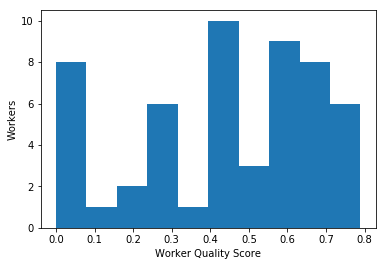

In [18]:
plt.hist(results["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

### Low quality workers

In [19]:
results["workers"].sort_values(by=["wqs"]).head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
44656777,1,1,1,16.0,0.000267,0.014584,0.018305,0.015075,0.073468,0.205196
44606916,5,5,1,70.6,0.000573,0.022518,0.025460,0.006691,0.057175,0.117028
31508822,3,3,1,573.0,0.001310,0.038485,0.034045,0.021185,0.102832,0.206015
15965551,25,25,1,30.0,0.008752,0.088362,0.099049,0.010984,0.091147,0.120512
6339764,10,10,1,80.5,0.019778,0.122949,0.160866,0.028307,0.122603,0.230880


In [20]:
work_id = results["workers"].sort_values(by=["wqs"]).index[1]
work_units = results["judgments"][results["judgments"]["worker"] == work_id]["unit"]
print(work_units)

judgment
3993903470    1856509900
3993909654    1856509903
3993905693    1856509920
3993909079    1856509923
3993914676    1856509946
Name: unit, dtype: int64


In [21]:
vid_url = results["units"]["input.videolocation"][work_units.iloc[0]]
HTML("<video width='320' height='240' controls><source src=" + str(vid_url) + " type='video/mp4'></video>")

In [22]:
import operator

work_judg = results["judgments"][results["judgments"]["unit"] == work_units.iloc[0]]

print("JUDGMENTS OF LOW QUALITY WORKER %d FOR VIDEO %d:" % (work_id, work_units.iloc[0]))
for k, v in work_judg[work_judg["worker"] == work_id]["output.selected_answer"].iloc[0].items():
    if v > 0:
        print(str(k) + " : " + str(v))

print("\nALL JUDGMENTS FOR VIDEO %d" % work_units.iloc[0])
sorted_judg = sorted(
    results["units"]["output.selected_answer"][work_units.iloc[0]].items(),
    key=operator.itemgetter(1),
    reverse=True)

for k, v in sorted_judg:
    if v > 0:
        print(str(k) + " : " + str(v))

JUDGMENTS OF LOW QUALITY WORKER 44606916 FOR VIDEO 1856509900:
celebrity : 1

ALL JUDGMENTS FOR VIDEO 1856509900
other : 9
scientist : 6
none : 3
celebrity : 2
journalist : 2
presenter : 2
archeologist : 1
fictionalcharacter : 1
producer : 1
psychologist : 1
writer : 1


In [23]:
vid_url = results["units"]["input.videolocation"][work_units.iloc[1]]
HTML("<video width='320' height='240' controls><source src=" + str(vid_url) + " type='video/mp4'></video>")

In [24]:
work_judg = results["judgments"][results["judgments"]["unit"] == work_units.iloc[1]]

print("JUDGMENTS OF LOW QUALITY WORKER %d FOR VIDEO %d:" % (work_id, work_units.iloc[1]))
for k, v in work_judg[work_judg["worker"] == work_id]["output.selected_answer"].iloc[0].items():
    if v > 0:
        print(str(k) + " : " + str(v))

print("\nALL JUDGMENTS FOR VIDEO %d" % work_units.iloc[0])
sorted_judg = sorted(
    results["units"]["output.selected_answer"][work_units.iloc[1]].items(),
    key=operator.itemgetter(1),
    reverse=True)

for k, v in sorted_judg:
    if v > 0:
        print(str(k) + " : " + str(v))

JUDGMENTS OF LOW QUALITY WORKER 44606916 FOR VIDEO 1856509903:
archeologist : 1

ALL JUDGMENTS FOR VIDEO 1856509900
none : 15
other : 2
fictionalcharacter : 1
writer : 1
archeologist : 1
scientist : 1


### High quality workers

In [25]:
results["workers"].sort_values(by=["wqs"], ascending=False).head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
6432269,25,25,1,23.36,0.789141,0.836564,0.943312,0.579480,0.671050,0.863542
15176395,25,25,1,17.24,0.784259,0.832825,0.941685,0.571864,0.664663,0.860381
39021485,25,25,1,17.24,0.781853,0.831344,0.940468,0.573010,0.666604,0.859595
40712302,25,25,1,16.56,0.755567,0.816770,0.925067,0.537336,0.640505,0.838926
43620110,2,2,1,194.50,0.752887,0.772451,0.974672,0.637002,0.674885,0.943867


In [26]:
work_id = results["workers"].sort_values(by=["wqs"], ascending=False).index[1]
work_units = results["judgments"][results["judgments"]["worker"] == work_id]["unit"]
print(work_units)

judgment
3989754636    1856509904
3989763323    1856509908
3989755418    1856509909
3989760062    1856509910
3989762709    1856509911
3989750391    1856509913
3989766454    1856509914
3989759575    1856509919
3989752369    1856509921
3989760984    1856509922
3989765981    1856509925
3989765396    1856509926
3989753242    1856509927
3989767204    1856509930
3989755065    1856509932
3989762027    1856509933
3989751101    1856509934
3989758587    1856509936
3989752713    1856509937
3989761591    1856509940
3989756262    1856509941
3989767751    1856509942
3989764209    1856509943
3989756802    1856509948
3989757669    1856509949
Name: unit, dtype: int64


In [27]:
vid_url = results["units"]["input.videolocation"][work_units.iloc[0]]
HTML("<video width='320' height='240' controls><source src=" + str(vid_url) + " type='video/mp4'></video>")

In [28]:
work_judg = results["judgments"][results["judgments"]["unit"] == work_units.iloc[0]]

print("JUDGMENTS OF HIGH QUALITY WORKER %d FOR VIDEO %d:" % (work_id, work_units.iloc[0]))
for k, v in work_judg[work_judg["worker"] == work_id]["output.selected_answer"].iloc[0].items():
    if v > 0:
        print(str(k) + " : " + str(v))

print("\nALL JUDGMENTS FOR VIDEO %d" % work_units.iloc[0])
sorted_judg = sorted(
    results["units"]["output.selected_answer"][work_units.iloc[0]].items(),
    key=operator.itemgetter(1),
    reverse=True)

for k, v in sorted_judg:
    if v > 0:
        print(str(k) + " : " + str(v))

JUDGMENTS OF HIGH QUALITY WORKER 15176395 FOR VIDEO 1856509904:
journalist : 1
presenter : 1
scientist : 1

ALL JUDGMENTS FOR VIDEO 1856509904
scientist : 10
other : 6
presenter : 3
farmer : 2
businessperson : 2
journalist : 1


In [29]:
vid_url = results["units"]["input.videolocation"][work_units.iloc[1]]
HTML("<video width='320' height='240' controls><source src=" + str(vid_url) + " type='video/mp4'></video>")

In [30]:
work_judg = results["judgments"][results["judgments"]["unit"] == work_units.iloc[1]]

print("JUDGMENTS OF HIGH QUALITY WORKER %d FOR VIDEO %d:" % (work_id, work_units.iloc[1]))
for k, v in work_judg[work_judg["worker"] == work_id]["output.selected_answer"].iloc[0].items():
    if v > 0:
        print(str(k) + " : " + str(v))

print("\nALL JUDGMENTS FOR VIDEO %d" % work_units.iloc[1])
sorted_judg = sorted(
    results["units"]["output.selected_answer"][work_units.iloc[1]].items(),
    key=operator.itemgetter(1),
    reverse=True)

for k, v in sorted_judg:
    if v > 0:
        print(str(k) + " : " + str(v))

JUDGMENTS OF HIGH QUALITY WORKER 15176395 FOR VIDEO 1856509908:
none : 1

ALL JUDGMENTS FOR VIDEO 1856509908
none : 19
philosopher : 1


## Annotation Quality Scores

The **annotation metrics** are stored in `results["annotations"]`. The `aqs` column contains the **annotation quality scores**, capturing the overall worker agreement over one annotation.

In [31]:
results["annotations"]

,output.selected_answer,aqs,aqs_initial
archeologist,1000,1.000000e-08,1.000000e-08
architect,1000,1.000000e-08,1.000000e-08
artist,1000,2.512851e-01,2.520942e-01
astronaut,1000,9.999680e-01,9.523810e-01
athlete,1000,2.801650e-01,2.788104e-01
businessperson,1000,6.188727e-02,9.618163e-02
celebrity,1000,7.459197e-01,6.066316e-01
chef,1000,1.000000e-08,1.000000e-08
criminal,1000,1.272384e-01,1.530612e-01
engineer,1000,3.608684e-02,2.991453e-02


In [32]:
rows = []
header = ["unit", "videolocation", "subtitles", "imagetags", "subtitletags", "uqs", "uqs_initial"]
annotation_vector = ["archeologist", "architect", "artist", "astronaut", "athlete", "businessperson","celebrity", 
                         "chef", "criminal", "engineer", "farmer", "fictionalcharacter", "journalist", "judge", 
                         "lawyer", "militaryperson", "model", "monarch", "philosopher", "politician", "presenter", 
                         "producer", "psychologist", "scientist", "sportsmanager", "writer", "none", "other"]
header.extend(annotation_vector)
annotation_vector_in = ["archeologist_initial_initial", "architect_initial", "artist_initial", "astronaut_initial", 
                        "athlete_initial", "businessperson_initial","celebrity_initial", "chef_initial", 
                        "criminal_initial", "engineer_initial", "farmer_initial", "fictionalcharacter_initial", 
                        "journalist_initial", "judge_initial", "lawyer_initial", "militaryperson_initial", 
                        "model_initial", "monarch_initial", "philosopher_initial", "politician_initial", 
                        "presenter_initial", "producer_initial", "psychologist_initial", "scientist_initial", 
                        "sportsmanager_initial", "writer_initial", "none_initial", "other_initial"]
header.extend(annotation_vector_in)
units = results["units"].reset_index()
for i in range(len(units.index)):
    row = [units["unit"].iloc[i], units["input.videolocation"].iloc[i], units["input.subtitles"].iloc[i], \
           units["input.imagetags"].iloc[i], units["input.subtitletags"].iloc[i], units["uqs"].iloc[i], 
           units["uqs_initial"].iloc[i]]
    for item in annotation_vector:
        row.append(units["unit_annotation_score"].iloc[i][item])
    for item in annotation_vector_in:
        row.append(units["unit_annotation_score_initial"].iloc[i][item])
    rows.append(row)
rows = pd.DataFrame(rows, columns=header)
rows.to_csv("../data/results/multchoice-people-video-units.csv", index=False)

In [33]:
results["workers"].to_csv("../data/results/multchoice-people-video-workers.csv", index=True)

In [34]:
results["annotations"].to_csv("../data/results/multchoice-people-video-annotations.csv", index=True)